## Assignment2 - Supervised Learning flow

### Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [ ]:
# student 1:
# student 2:
# student 3:
# student 4:
# (optional) student 5:
# (optional) student 6:

In [7]:
import pandas as pd

# Load the data
train_df = pd.read_csv('C:/Users/Leon/Desktop/house prices/housing_train.csv')
test_df = pd.read_csv('C:/Users/Leon/Desktop/house prices/housing_test.csv')

# Display the first 5 rows of each dataset
print("Train Dataset:")
print(train_df.head())
print("\nTest Dataset:")
print(test_df.head())


Train Dataset:
   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  4.0179      46.0  4.158690   1.032746       512.0  1.289673     34.07   
1  2.7002       6.0  4.149245   1.179989      4092.0  2.287311     34.05   
2  1.2762      17.0  3.432331   1.022556      1325.0  2.490602     34.42   
3  4.9342      23.0  5.735798   1.053201      4580.0  4.129847     34.04   
4  2.2755      21.0  4.064607   0.962079      2109.0  2.962079     32.58   

   Longitude  MedHouseVal  
0    -118.35        3.500  
1    -117.31        0.883  
2    -119.69        2.536  
3    -117.93        1.810  
4    -117.11        1.250  

Test Dataset:
   MedInc  HouseAge   AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  5.3254      32.0   5.786260   1.033079       982.0  2.498728     34.29   
1  5.3032      52.0   5.095745   1.028369       980.0  3.475177     34.08   
2  4.1679      41.0   6.617486   1.371585       915.0  2.500000     37.05   
3  3.6429      28.0   5.249180   1.00

In [8]:
train_stats = train_df.describe()
test_stats = test_df.describe()

train_stats, test_stats

(             MedInc      HouseAge      AveRooms     AveBedrms    Population  \
 count  16512.000000  16512.000000  16512.000000  16512.000000  16512.000000   
 mean       3.863517     28.650678      5.412479      1.093546   1424.287609   
 std        1.878577     12.623994      2.088680      0.378594   1139.012630   
 min        0.499900      1.000000      0.846154      0.333333      3.000000   
 25%        2.564375     18.000000      4.448665      1.005988    789.000000   
 50%        3.536650     29.000000      5.225511      1.048780   1167.000000   
 75%        4.744375     37.000000      6.046629      1.099691   1722.000000   
 max       15.000100     52.000000     62.422222     15.312500  35682.000000   
 
            AveOccup      Latitude     Longitude   MedHouseVal  
 count  16512.000000  16512.000000  16512.000000  16512.000000  
 mean       3.101201     35.631452   -119.566283      2.065267  
 std       11.587773      2.137537      2.006552      1.151219  
 min        0.6923

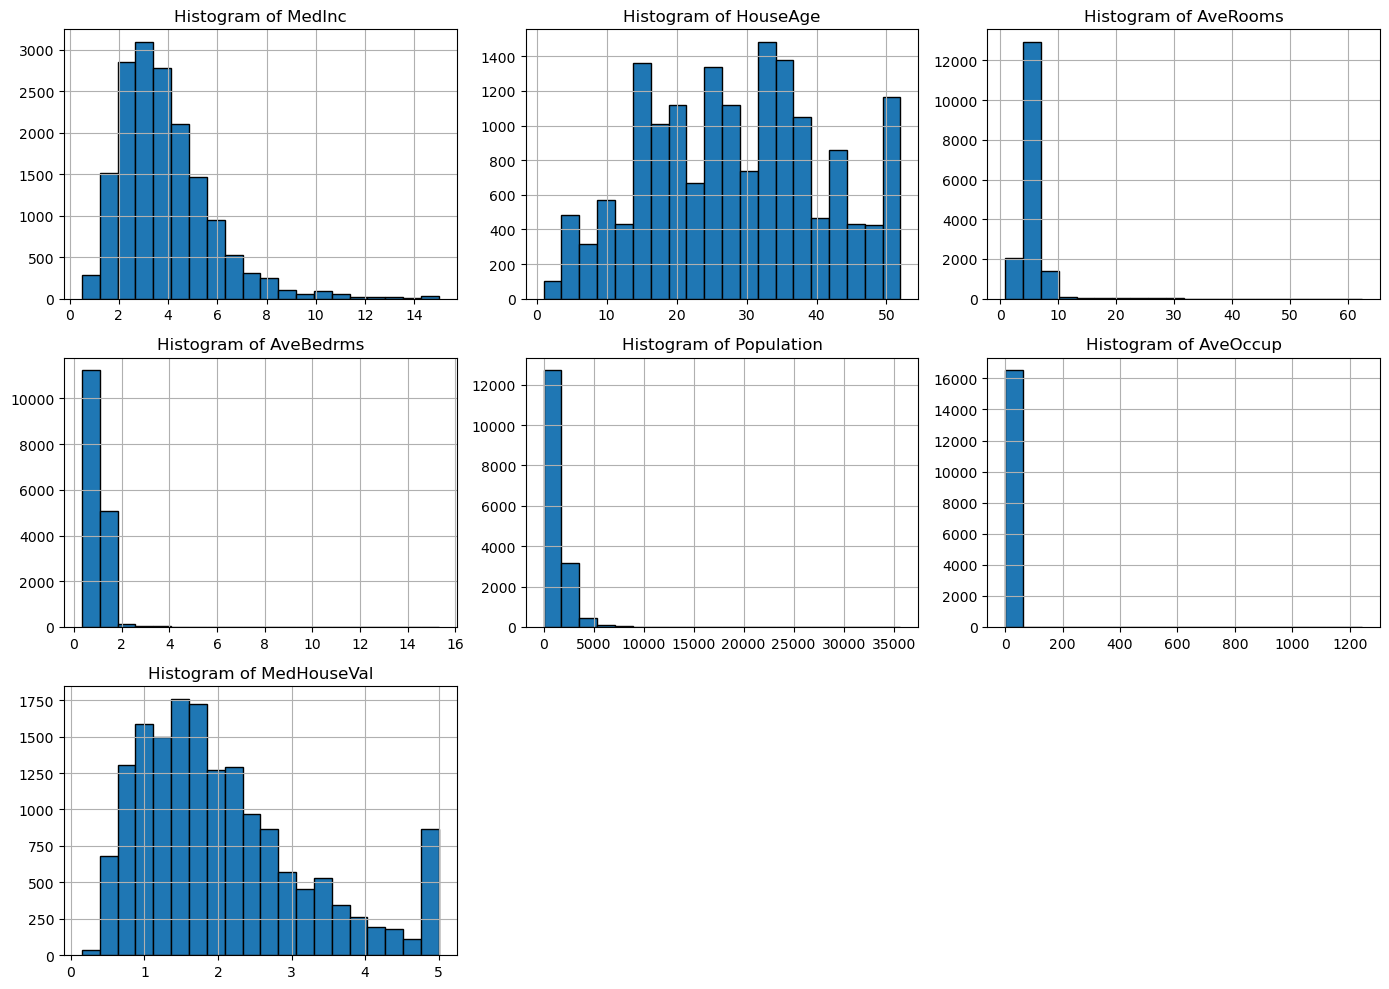

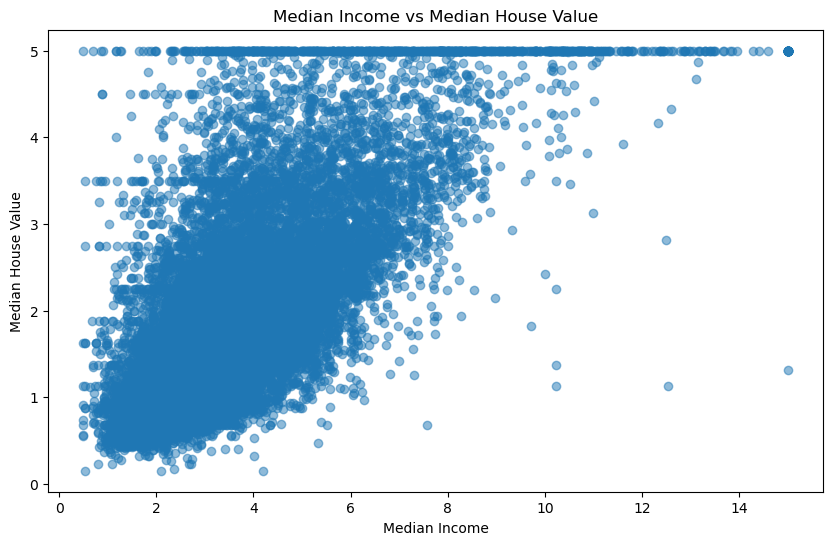

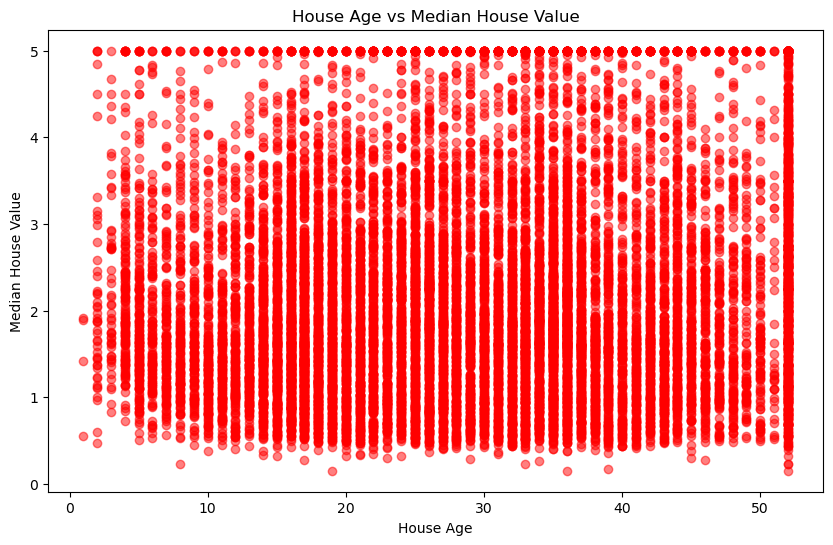

In [9]:
import matplotlib.pyplot as plt

# Histograms for some features
features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'MedHouseVal']

plt.figure(figsize=(14, 10))
for i, feature in enumerate(features, 1):
    plt.subplot(3, 3, i)
    train_df[feature].hist(bins=20, edgecolor='black')
    plt.title(f'Histogram of {feature}')
plt.tight_layout()
plt.show()

# Scatter plot of MedInc vs MedHouseVal
plt.figure(figsize=(10, 6))
plt.scatter(train_df['MedInc'], train_df['MedHouseVal'], alpha=0.5)
plt.title('Median Income vs Median House Value')
plt.xlabel('Median Income')
plt.ylabel('Median House Value')
plt.show()

# Scatter plot of HouseAge vs MedHouseVal
plt.figure(figsize=(10, 6))
plt.scatter(train_df['HouseAge'], train_df['MedHouseVal'], alpha=0.5, color='r')
plt.title('House Age vs Median House Value')
plt.xlabel('House Age')
plt.ylabel('Median House Value')
plt.show()


In [10]:
from sklearn.preprocessing import StandardScaler

# List of numerical features
numerical_features = ['MedInc', 'HouseAge', 'AveRooms', 'AveBedrms', 'Population', 'AveOccup', 'Latitude', 'Longitude']

# Standardizing the numerical features
scaler = StandardScaler()
train_df[numerical_features] = scaler.fit_transform(train_df[numerical_features])
test_df[numerical_features] = scaler.transform(test_df[numerical_features])

# Display the first 5 rows after scaling
train_df.head(), test_df.head()


(     MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0  0.082183  1.374355 -0.600296  -0.160600   -0.800970 -0.156336 -0.730513   
 1 -0.619273 -1.794310 -0.604818   0.228333    2.342198 -0.070239 -0.739870   
 2 -1.377316 -0.922928 -0.948067  -0.187514   -0.087173 -0.052695 -0.566769   
 3  0.569961 -0.447628  0.154800  -0.106568    2.770652  0.088773 -0.744549   
 4 -0.845355 -0.606061 -0.645342  -0.347262    0.601164 -0.012006 -1.427598   
 
    Longitude  MedHouseVal  
 0   0.606174        3.500  
 1   1.124491        0.883  
 2  -0.061659        2.536  
 3   0.815494        1.810  
 4   1.224168        1.250  ,
      MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
 0  0.778210  0.265322  0.178961  -0.159719   -0.388320 -0.051994 -0.627588   
 1  0.766392  1.849655 -0.151648  -0.172161   -0.390076  0.032274 -0.725835   
 2  0.162033  0.978272  0.576940   0.734420   -0.447144 -0.051884  0.663657   
 3 -0.117442 -0.051545 -0.078185 

In [11]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import GridSearchCV

# Define features and target
X_train = train_df.drop(columns=['MedHouseVal'])
y_train = train_df['MedHouseVal']

X_test = test_df.drop(columns=['MedHouseVal'])
y_test = test_df['MedHouseVal']

# Linear Regression
lin_reg = LinearRegression()
lin_reg.fit(X_train, y_train)
lin_reg_pred = lin_reg.predict(X_test)

# Decision Tree Regressor with Grid Search for hyperparameter tuning
tree_params = {'max_depth': [5, 10, 15, 20, None], 'min_samples_split': [2, 10, 20]}
tree_reg = DecisionTreeRegressor()
tree_grid = GridSearchCV(tree_reg, tree_params, cv=5, scoring='r2')
tree_grid.fit(X_train, y_train)
tree_best = tree_grid.best_estimator_
tree_best_pred = tree_best.predict(X_test)

# Display results
lin_reg_score = lin_reg.score(X_test, y_test)
tree_best_score = tree_best.score(X_test, y_test)

lin_reg_score, tree_best_score


(0.604070344981614, 0.7234452891150063)

In [12]:
# Retrain Decision Tree Regressor on the entire training set
tree_best.fit(X_train, y_train)

# Predict on the test set
final_predictions = tree_best.predict(X_test)

# Evaluate the model on the test set
final_score = tree_best.score(X_test, y_test)

# Display first few predictions and final score
first_predictions = final_predictions[:5]
first_predictions, final_score


(array([3.45407762, 2.22014943, 2.64874248, 1.45957143, 1.39136364]),
 0.7233478142519028)

## Part 2 - Experiments
You could add as many code cells as needed

## Part 3 - Training flow
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 2)

## Part 4 - Apply on test and show model performance estimation